In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [26]:
df = pd.read_csv("countries of the world.csv")
df1 = df.dropna()

# Countries of the World
#### -> Exploring the relationships between countries

In [27]:
df1.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"


### All commas will be treated as periods

In [28]:
df1.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,1.790000e+02,1.790000e+02,179.000000
mean,3.421415e+07,5.641830e+05,9125.698324
std,1.317639e+08,1.395657e+06,9644.123141
min,1.347700e+04,2.800000e+01,500.000000
25%,1.188580e+06,1.991500e+04,1800.000000
50%,6.940432e+06,1.184800e+05,5100.000000
75%,2.086014e+07,4.964410e+05,12950.000000
max,1.313974e+09,9.631420e+06,37800.000000


In [29]:
df1.columns = ['country', 'region', 'pop', 'area', 'pop den', 'coastline', 'net migration', 'infant mortality', 'gdp', 'literacy', 'phones', 'arable', 'crops', 'other', 'climate', 'birthrate', 'deathrate', 'agri', 'industry', 'service']

<AxesSubplot:title={'center':'Area vs. Population'}, xlabel='area', ylabel='pop'>

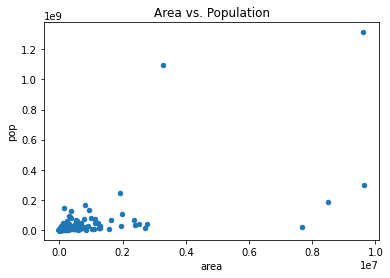

In [48]:
df1.plot.scatter('area', 'pop', title = 'Area vs. Population')

##### In the scatterplot Area vs. Population, there appears to be a very weak positive relationship. To test this theory a simple linear regression will be used to examine the relationship.

In [31]:
X = df1['area'] 
Y = df1['pop']

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     105.4
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.09e-19
Time:                        14:58:07   Log-Likelihood:                -3558.4
No. Observations:                 179   AIC:                             7121.
Df Residuals:                     177   BIC:                             7127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+06   8.44e+06      0.199      0.8

#### The coefficient for area is positive as predicted by the scatterplot and is significant to the 0.01 p-value level. But when examing the R-squared we find that it only explains about 22.1% of the variance. Therefore the regression is rather unreliable because it does not fit the model very well.

#### A relating question that can be asked is "does GDP affect population". To check this hypothesis two approaches can be applied. firstly, a simple linear regression between GDP and population and secondly, a multiple regression with area and GDP as the explantory variables and population as the response variable.

In [32]:
X = df1[['area','gdp']]
Y = df1['pop']

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     53.67
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           6.33e-19
Time:                        14:58:12   Log-Likelihood:                -3557.5
No. Observations:                 179   AIC:                             7121.
Df Residuals:                     176   BIC:                             7131.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e+07   1.11e+07      0.978      0.3

#### The R-squared for the multiple regression is 37.9% which is an important from the simple linear regression. Another note is the f-value has a low p-value, thus the group of coefficients are significant. The only variable significant alone is area with a p-value below the 0.01 level. GDP aloned is not significant but when place in a model with area it does influence the results. 